In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

In [2]:
Sales_NYC = pd.read_csv('Sales NYC clean.csv')
Sales_NYC.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Hood
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6TH STREET,NaN,...,1.0,2.0,"2,090","3,680",1940.0,1,S1,"3,200,000",7/24/2019,East Village
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,0.0,1.0,987,"2,183",1860.0,1,A4,0,9/25/2019,East Village
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,0.0,2.0,"1,510","4,520",1900.0,1,B9,0,7/22/2019,East Village
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56,NaN,C0,263 EAST 7TH STREET,NaN,...,0.0,3.0,"2,430","3,600",1899.0,1,C0,"6,300,000",4/30/2019,East Village
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9,NaN,C0,604 EAST 11TH STREET,NaN,...,0.0,3.0,"2,375","5,110",1939.0,1,C0,0,10/24/2019,East Village


In [3]:
Sales_NYC.shape
Sales_NYC.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       ' SALE PRICE ', 'SALE DATE', 'Hood'],
      dtype='object')

In [4]:
# Cleaning up some unused columns, renaming " SALE PRICE " to "SALE PRICE" no extra spaces
SalesNY=Sales_NYC[["BOROUGH","Hood", "BUILDING CLASS CATEGORY","ZIP CODE","TOTAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET","YEAR BUILT","SALE DATE"," SALE PRICE "]]

SalesNY.rename(columns={" SALE PRICE ": "SALE PRICE"}, inplace=True)
SalesNY.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,BOROUGH,Hood,BUILDING CLASS CATEGORY,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE
0,1,East Village,01 ONE FAMILY DWELLINGS,10009,2.0,"2,090","3,680",1940.0,7/24/2019,"3,200,000"
1,1,East Village,01 ONE FAMILY DWELLINGS,10009,1.0,987,"2,183",1860.0,9/25/2019,0
2,1,East Village,02 TWO FAMILY DWELLINGS,10009,2.0,"1,510","4,520",1900.0,7/22/2019,0
3,1,East Village,03 THREE FAMILY DWELLINGS,10009,3.0,"2,430","3,600",1899.0,4/30/2019,"6,300,000"
4,1,East Village,03 THREE FAMILY DWELLINGS,10009,3.0,"2,375","5,110",1939.0,10/24/2019,0


In [5]:
#SalesNY.describe()
SalesNY.dtypes
#df['DataFrame Column'] = df['DataFrame Column'].astype(int)
#SalesNY["SALE PRICE"]=SalesNY["SALE PRICE"].astype(int)

BOROUGH                      int64
Hood                        object
BUILDING CLASS CATEGORY     object
ZIP CODE                     int64
TOTAL UNITS                float64
LAND SQUARE FEET            object
GROSS SQUARE FEET           object
YEAR BUILT                 float64
SALE DATE                   object
SALE PRICE                  object
dtype: object

In [6]:
SalesNY[['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET']]

,SALE PRICE,LAND SQUARE FEET,GROSS SQUARE FEET
0,"3,200,000","2,090","3,680"
1,0,987,"2,183"
2,0,"1,510","4,520"
3,"6,300,000","2,430","3,600"
4,0,"2,375","5,110"
...,...,...,...
16737,"16,900,000","4,752",0
16738,"15,000","2,800",0
16739,"16,900,000","4,500",0
16740,"16,900,000","27,829",0


In [7]:
## Removing commas and making the price as int
SalesNY['SALE PRICE']=SalesNY['SALE PRICE'].str.replace(',','')
SalesNY["SALE PRICE"]=SalesNY["SALE PRICE"].astype(int)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
SalesNY.dtypes

BOROUGH                      int64
Hood                        object
BUILDING CLASS CATEGORY     object
ZIP CODE                     int64
TOTAL UNITS                float64
LAND SQUARE FEET            object
GROSS SQUARE FEET           object
YEAR BUILT                 float64
SALE DATE                   object
SALE PRICE                   int64
dtype: object

In [9]:
## Changing the format of land square feet and gross square feet into float number without comma
SalesNY['LAND SQUARE FEET']=SalesNY['LAND SQUARE FEET'].str.replace(',','')
SalesNY['GROSS SQUARE FEET']=SalesNY['GROSS SQUARE FEET'].str.replace(',','')

SalesNY["LAND SQUARE FEET"]=SalesNY["LAND SQUARE FEET"].astype(float)
SalesNY["GROSS SQUARE FEET"]=SalesNY["GROSS SQUARE FEET"].astype(float)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [10]:
#calculation the number of NaN values
missing_data = SalesNY.isnull()
missing_data.head(5)

,BOROUGH,Hood,BUILDING CLASS CATEGORY,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [11]:
# Printing the NaN values (True) by column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

BOROUGH
False    16742
Name: BOROUGH, dtype: int64

Hood
False    16742
Name: Hood, dtype: int64

BUILDING CLASS CATEGORY
False    16742
Name: BUILDING CLASS CATEGORY, dtype: int64

ZIP CODE
False    16742
Name: ZIP CODE, dtype: int64

TOTAL UNITS
False    9203
True     7539
Name: TOTAL UNITS, dtype: int64

LAND SQUARE FEET
False    9203
True     7539
Name: LAND SQUARE FEET, dtype: int64

GROSS SQUARE FEET
False    9203
True     7539
Name: GROSS SQUARE FEET, dtype: int64

YEAR BUILT
False    14768
True      1974
Name: YEAR BUILT, dtype: int64

SALE DATE
False    16742
Name: SALE DATE, dtype: int64

SALE PRICE
False    16742
Name: SALE PRICE, dtype: int64



We can see that there are over 16000 entries with sale price but only ~9200 have updated square feet
Let's add the average of a neighberhood instead of NaN

In [12]:
#Cpde to calculate mean by group

#grouped_test2 = df_gptest2.groupby(['body-style'],as_index=False).mean()

In [13]:
#Let's check how many total entries we have per building class
Total_entries=SalesNY.groupby(['BUILDING CLASS CATEGORY'],as_index=False).count()
Total_entries

,BUILDING CLASS CATEGORY,BOROUGH,Hood,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE
0,01 ONE FAMILY DWELLINGS,132,132,132,132,132,132,132,132,132
1,02 TWO FAMILY DWELLINGS,113,113,113,113,113,113,113,113,113
2,03 THREE FAMILY DWELLINGS,66,66,66,66,66,66,66,66,66
3,04 TAX CLASS 1 CONDOS,16,16,16,16,16,16,14,16,16
4,07 RENTALS - WALKUP APARTMENTS,585,585,585,585,585,585,585,585,585
5,08 RENTALS - ELEVATOR APARTMENTS,184,184,184,184,184,184,184,184,184
6,09 COOPS - WALKUP APARTMENTS,789,789,789,0,0,0,789,789,789
7,10 COOPS - ELEVATOR APARTMENTS,5649,5649,5649,0,0,0,5649,5649,5649
8,11 SPECIAL CONDO BILLING LOTS,35,35,35,34,34,34,34,35,35
9,12 CONDOS - WALKUP APARTMENTS,146,146,146,146,146,146,112,146,146


In [14]:
## Let's show the total entries by decending order.

Total_entries.sort_values(by='Hood', ascending=True, inplace=True)
Total_entries


,BUILDING CLASS CATEGORY,BOROUGH,Hood,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE
31,41 TAX CLASS 4 - OTHER,2,2,2,2,2,2,2,2,2
38,48 CONDO TERRACES/GARDENS/CABANAS,2,2,2,2,2,2,1,2,2
39,49 CONDO WAREHOUSES/FACTORY/INDUS,3,3,3,3,3,3,0,3,3
29,36 OUTDOOR RECREATIONAL FACILITIES,3,3,3,3,3,3,0,3,3
27,34 THEATRES,3,3,3,3,3,3,3,3,3
32,42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,4,4,4,3,3,3,2,4,4
20,27 FACTORIES,4,4,4,4,4,4,4,4,4
23,30 WAREHOUSES,5,5,5,5,5,5,5,5,5
25,32 HOSPITAL AND HEALTH FACILITIES,5,5,5,5,5,5,5,5,5
26,33 EDUCATIONAL FACILITIES,7,7,7,7,7,7,7,7,7


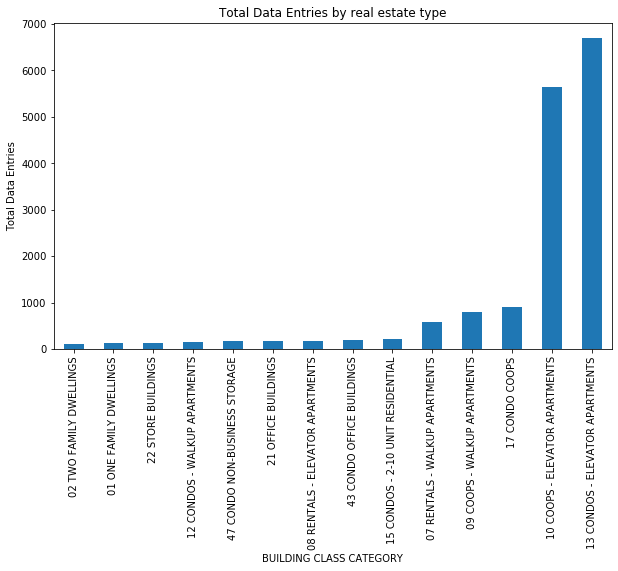

In [15]:
Top_entries=Total_entries[Total_entries.Hood > 110]
Top_entries.set_index('BUILDING CLASS CATEGORY',inplace=True)

import matplotlib.pyplot as plt

Top_entries['BOROUGH'].plot(kind='bar', figsize=(10, 6))
plt.ylabel('Total Data Entries')
plt.title('Total Data Entries by real estate type')


plt.show()

In [16]:
## Creating a dataframe with only the top tpyes of building class. Only the builiding class that is in the top entry df will be considered.
dfNY=SalesNY[SalesNY['BUILDING CLASS CATEGORY'].isin(Top_entries.index)]
dfNY.groupby(['BUILDING CLASS CATEGORY'],as_index=False).count()

,BUILDING CLASS CATEGORY,BOROUGH,Hood,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE
0,01 ONE FAMILY DWELLINGS,132,132,132,132,132,132,132,132,132
1,02 TWO FAMILY DWELLINGS,113,113,113,113,113,113,113,113,113
2,07 RENTALS - WALKUP APARTMENTS,585,585,585,585,585,585,585,585,585
3,08 RENTALS - ELEVATOR APARTMENTS,184,184,184,184,184,184,184,184,184
4,09 COOPS - WALKUP APARTMENTS,789,789,789,0,0,0,789,789,789
5,10 COOPS - ELEVATOR APARTMENTS,5649,5649,5649,0,0,0,5649,5649,5649
6,12 CONDOS - WALKUP APARTMENTS,146,146,146,146,146,146,112,146,146
7,13 CONDOS - ELEVATOR APARTMENTS,6689,6689,6689,6490,6490,6490,5247,6689,6689
8,15 CONDOS - 2-10 UNIT RESIDENTIAL,216,216,216,215,215,215,169,216,216
9,17 CONDO COOPS,896,896,896,0,0,0,739,896,896


In [17]:
# Let's look at places that have true sale value (above 100K)
TrueSale=dfNY[dfNY["SALE PRICE"]>100001]
TrueSale.reset_index(drop=True)

,BOROUGH,Hood,BUILDING CLASS CATEGORY,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE
0,1,East Village,01 ONE FAMILY DWELLINGS,10009,2.0,2090.0,3680.0,1940.0,7/24/2019,3200000
1,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,12.0,2393.0,7989.0,2001.0,8/8/2019,1950000
2,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,4.0,2059.0,4154.0,1900.0,12/12/2019,600000
3,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,4.0,2065.0,3491.0,1900.0,10/31/2019,4350000
4,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,19.0,2772.0,13248.0,1920.0,3/13/2020,125375
...,...,...,...,...,...,...,...,...,...,...
12652,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10040,1.0,0.0,0.0,1987.0,4/5/2019,432000
12653,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10033,1.0,0.0,0.0,2003.0,9/26/2019,975000
12654,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10033,1.0,0.0,0.0,2003.0,5/6/2019,870000
12655,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10040,1.0,0.0,0.0,2008.0,9/17/2019,512500


In [18]:
## dropping everything that is not residential

## list of building classes to drop
DropClass=['21 OFFICE BUILDINGS','43 CONDO OFFICE BUILDINGS','47 CONDO NON-BUSINESS STORAGE','22 STORE BUILDINGS']
TrueSale=TrueSale[~TrueSale['BUILDING CLASS CATEGORY'].isin(DropClass)]


In [19]:
TrueSale.groupby(['BUILDING CLASS CATEGORY'],as_index=False).count()

,BUILDING CLASS CATEGORY,BOROUGH,Hood,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE
0,01 ONE FAMILY DWELLINGS,92,92,92,92,92,92,92,92,92
1,02 TWO FAMILY DWELLINGS,66,66,66,66,66,66,66,66,66
2,07 RENTALS - WALKUP APARTMENTS,282,282,282,282,282,282,282,282,282
3,08 RENTALS - ELEVATOR APARTMENTS,93,93,93,93,93,93,93,93,93
4,09 COOPS - WALKUP APARTMENTS,699,699,699,0,0,0,699,699,699
5,10 COOPS - ELEVATOR APARTMENTS,4963,4963,4963,0,0,0,4963,4963,4963
6,12 CONDOS - WALKUP APARTMENTS,114,114,114,114,114,114,95,114,114
7,13 CONDOS - ELEVATOR APARTMENTS,5027,5027,5027,4989,4989,4989,4086,5027,5027
8,15 CONDOS - 2-10 UNIT RESIDENTIAL,177,177,177,176,176,176,142,177,177
9,17 CONDO COOPS,719,719,719,0,0,0,628,719,719


In [20]:
#let's look at the average price by residential type and hood
TrueSale.groupby(['BUILDING CLASS CATEGORY','Hood'],as_index=False).median()

,BUILDING CLASS CATEGORY,Hood,BOROUGH,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,01 ONE FAMILY DWELLINGS,Central Harlem,1.0,10030.0,1.0,1699.0,4308.0,1910.0,2187500.0
1,01 ONE FAMILY DWELLINGS,Chelsea,1.0,10011.0,1.0,1562.0,4150.0,1901.0,6725000.0
2,01 ONE FAMILY DWELLINGS,East Harlem,1.0,10032.0,1.5,1312.0,2808.0,1899.5,3800000.0
3,01 ONE FAMILY DWELLINGS,East Village,1.0,10003.0,1.0,2090.0,3225.0,1901.0,7650000.0
4,01 ONE FAMILY DWELLINGS,Greenwich Village,1.0,10014.0,1.0,1665.0,3372.0,1905.0,9800000.0
...,...,...,...,...,...,...,...,...,...
177,17 CONDO COOPS,Roosevelt Island,1.0,10044.0,NaN,NaN,NaN,1975.0,1371587.0
178,17 CONDO COOPS,Soho,1.0,10012.0,NaN,NaN,NaN,1930.0,1995000.0
179,17 CONDO COOPS,Tribeca,1.0,10013.0,NaN,NaN,NaN,1915.0,2999900.0
180,17 CONDO COOPS,Upper East Side,1.0,10021.0,NaN,NaN,NaN,1960.0,823211.5


In [21]:
MedianSales=TrueSale.groupby(['BUILDING CLASS CATEGORY'],as_index=False).median()
MedianSales

,BUILDING CLASS CATEGORY,BOROUGH,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,01 ONE FAMILY DWELLINGS,1.0,10023.5,1.0,1828.0,4245.0,1903.0,8100000.0
1,02 TWO FAMILY DWELLINGS,1.0,10027.0,2.0,1738.5,3560.0,1901.0,4100000.0
2,07 RENTALS - WALKUP APARTMENTS,1.0,10027.0,10.0,2498.0,8852.5,1910.0,6012500.0
3,08 RENTALS - ELEVATOR APARTMENTS,1.0,10024.0,42.0,10070.0,59269.0,1930.0,12100000.0
4,09 COOPS - WALKUP APARTMENTS,1.0,10024.0,NaN,NaN,NaN,1910.0,625000.0
5,10 COOPS - ELEVATOR APARTMENTS,1.0,10022.0,NaN,NaN,NaN,1939.0,880000.0
6,12 CONDOS - WALKUP APARTMENTS,1.0,10025.0,1.0,0.0,0.0,1920.0,677500.0
7,13 CONDOS - ELEVATOR APARTMENTS,1.0,10017.0,1.0,0.0,0.0,2003.0,1700000.0
8,15 CONDOS - 2-10 UNIT RESIDENTIAL,1.0,10013.0,1.0,0.0,0.0,1920.0,2475000.0
9,17 CONDO COOPS,1.0,10023.0,NaN,NaN,NaN,1960.0,810000.0


Text(0.5, 1.0, 'Sale price in M$ by residential type')

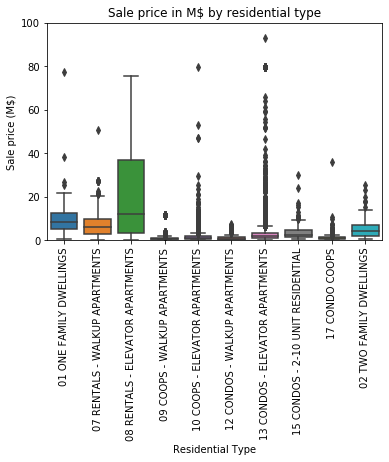

In [22]:
import seaborn as sns

ax=sns.boxplot(x=TrueSale['BUILDING CLASS CATEGORY'], y=TrueSale['SALE PRICE']/1000000 )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='Residential Type', ylabel='Sale price (M$)')
ax.set(ylim=(0, 100))
plt.title('Sale price in M$ by residential type')
#plt.show()


In [23]:
TrueSale.shape

(12232, 10)

In [24]:
### Adding column of cost per unit for the rental buildings. Cost is in M$
## Coops don't have number of units so we will treat the NaN as 1 unit


TrueSale["TOTAL UNITS"].replace(np.nan, 1, inplace=True)

TrueSale['PricePerUnit']=TrueSale['SALE PRICE']/(TrueSale['TOTAL UNITS']*1000000)
TrueSale['SFperUnit']=TrueSale['GROSS SQUARE FEET']/(TrueSale['TOTAL UNITS'])
TrueSale

,BOROUGH,Hood,BUILDING CLASS CATEGORY,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE,PricePerUnit,SFperUnit
0,1,East Village,01 ONE FAMILY DWELLINGS,10009,2.0,2090.0,3680.0,1940.0,7/24/2019,3200000,1.600000,1840.000000
5,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,12.0,2393.0,7989.0,2001.0,8/8/2019,1950000,0.162500,665.750000
7,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,4.0,2059.0,4154.0,1900.0,12/12/2019,600000,0.150000,1038.500000
8,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,4.0,2065.0,3491.0,1900.0,10/31/2019,4350000,1.087500,872.750000
12,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,19.0,2772.0,13248.0,1920.0,3/13/2020,125375,0.006599,697.263158
...,...,...,...,...,...,...,...,...,...,...,...,...
16722,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10040,1.0,0.0,0.0,1987.0,4/5/2019,432000,0.432000,0.000000
16725,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10033,1.0,0.0,0.0,2003.0,9/26/2019,975000,0.975000,0.000000
16727,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10033,1.0,0.0,0.0,2003.0,5/6/2019,870000,0.870000,0.000000
16728,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10040,1.0,0.0,0.0,2008.0,9/17/2019,512500,0.512500,0.000000


Text(0.5, 1.0, 'Sale price in M$ by residential type')

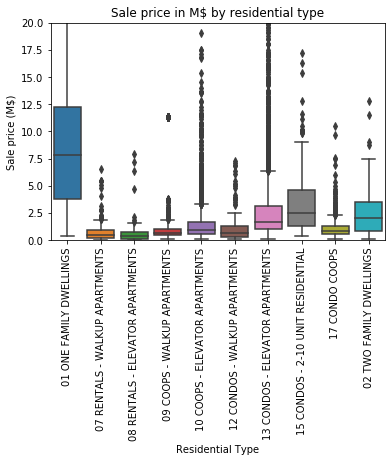

In [25]:
import seaborn as sns

ax=sns.boxplot(x=TrueSale['BUILDING CLASS CATEGORY'], y=TrueSale['PricePerUnit'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='Residential Type', ylabel='Sale price (M$)')
ax.set(ylim=(0, 20))
plt.title('Sale price in M$ by residential type')
#plt.show()




In [26]:
MedianSalesPerUnit=TrueSale[['BUILDING CLASS CATEGORY','PricePerUnit']].groupby(['BUILDING CLASS CATEGORY'],as_index=False).median()
MedianSalesPerUnit

,BUILDING CLASS CATEGORY,PricePerUnit
0,01 ONE FAMILY DWELLINGS,7.825000
1,02 TWO FAMILY DWELLINGS,2.032500
2,07 RENTALS - WALKUP APARTMENTS,0.500000
3,08 RENTALS - ELEVATOR APARTMENTS,0.346698
4,09 COOPS - WALKUP APARTMENTS,0.625000
5,10 COOPS - ELEVATOR APARTMENTS,0.880000
6,12 CONDOS - WALKUP APARTMENTS,0.677500
7,13 CONDOS - ELEVATOR APARTMENTS,1.700000
8,15 CONDOS - 2-10 UNIT RESIDENTIAL,2.475000
9,17 CONDO COOPS,0.810000


Text(0.5, 1, 'Square feet vs. Price per unit')

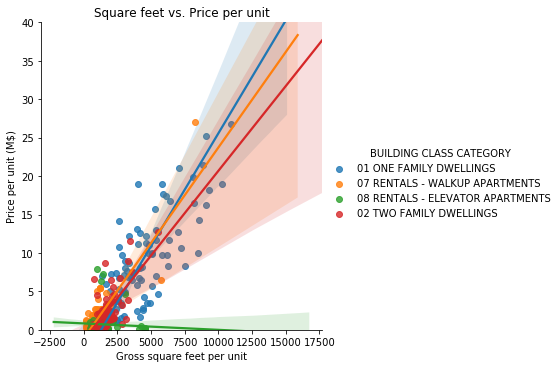

In [27]:
# Examine the relation between square feet per unit and price. Only gross SF >0 will be accounted. 
ax=sns.lmplot(x="SFperUnit", y="PricePerUnit", hue="BUILDING CLASS CATEGORY", data=TrueSale[TrueSale["GROSS SQUARE FEET"]>0]);
ax.set(xlabel='Gross square feet per unit', ylabel='Price per unit (M$)')
ax.set(ylim=(0, 40))
plt.title('Square feet vs. Price per unit')

In [28]:

## How well does SF correlates to Price per unit?
TrueSale[TrueSale["GROSS SQUARE FEET"]>0][['SFperUnit', 'PricePerUnit']].corr()

,SFperUnit,PricePerUnit
SFperUnit,1.000000,0.814329
PricePerUnit,0.814329,1.000000


In [29]:
#fitting linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = TrueSale[TrueSale["GROSS SQUARE FEET"]>0][['SFperUnit']]
Y = TrueSale[TrueSale["GROSS SQUARE FEET"]>0][['PricePerUnit']]

In [30]:
lm.fit(X,Y)
print("PricePerUnit=Slope*SFPerUnit + Intercept")
print("Intercept:",lm.intercept_)
print("Slope:",lm.coef_)


PricePerUnit=Slope*SFPerUnit + Intercept
Intercept: [-1.49311099]
Slope: [[0.00237466]]


<h2>By neighberhood analysis </h2>

In [31]:
#Lets consider only the condos, apartments and coops. These are the most common residential types in Manhattan.
DropClass1=['01 ONE FAMILY DWELLINGS','02 TWO FAMILY DWELLINGS']
TrueSale=TrueSale[~TrueSale['BUILDING CLASS CATEGORY'].isin(DropClass1)]
TrueSale

,BOROUGH,Hood,BUILDING CLASS CATEGORY,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE DATE,SALE PRICE,PricePerUnit,SFperUnit
5,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,12.0,2393.0,7989.0,2001.0,8/8/2019,1950000,0.162500,665.750000
7,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,4.0,2059.0,4154.0,1900.0,12/12/2019,600000,0.150000,1038.500000
8,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,4.0,2065.0,3491.0,1900.0,10/31/2019,4350000,1.087500,872.750000
12,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,19.0,2772.0,13248.0,1920.0,3/13/2020,125375,0.006599,697.263158
13,1,East Village,07 RENTALS - WALKUP APARTMENTS,10009,19.0,2772.0,13248.0,1920.0,12/19/2019,1269168,0.066798,697.263158
...,...,...,...,...,...,...,...,...,...,...,...,...
16722,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10040,1.0,0.0,0.0,1987.0,4/5/2019,432000,0.432000,0.000000
16725,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10033,1.0,0.0,0.0,2003.0,9/26/2019,975000,0.975000,0.000000
16727,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10033,1.0,0.0,0.0,2003.0,5/6/2019,870000,0.870000,0.000000
16728,1,Washington Heights,13 CONDOS - ELEVATOR APARTMENTS,10040,1.0,0.0,0.0,2008.0,9/17/2019,512500,0.512500,0.000000


In [32]:
HoodMedianSale=TrueSale[['Hood','PricePerUnit']].groupby(['Hood'],as_index=False).median()
HoodMedianSale

,Hood,PricePerUnit
0,Central Harlem,0.710000
1,Chelsea,1.195000
2,Chinatown,1.059500
3,Civic Center,2.466200
4,Clinton,0.871500
5,East Harlem,0.701500
6,East Village,0.820000
7,Financial District,1.022250
8,Flatiron,1.675000
9,Gramercy,1.225000


In [33]:
## setting up 4Square 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

Solving environment: done

# All requested packages already installed.



In [34]:
#Downloading the newyork JSON data with neighberhood locators

!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [35]:
## Loading JSON data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [36]:
neighborhoods_data = newyork_data['features']

In [37]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

##Then let's loop through the data and fill the dataframe one row at a time.


for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [38]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [39]:
## Lets look only at Manhatthan
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [40]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [41]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [42]:
## Let's combine the latidue longitude data with the median house sale
HoodMedianSale = HoodMedianSale.merge(manhattan_data, left_on="Hood", right_on="Neighborhood", how="outer", suffixes=("_tableA", "_tableB"))

In [43]:
HoodMedianSale

,Hood,PricePerUnit,Borough,Neighborhood,Latitude,Longitude
0,Central Harlem,0.710000,Manhattan,Central Harlem,40.815976,-73.943211
1,Chelsea,1.195000,Manhattan,Chelsea,40.744035,-74.003116
2,Chinatown,1.059500,Manhattan,Chinatown,40.715618,-73.994279
3,Civic Center,2.466200,Manhattan,Civic Center,40.715229,-74.005415
4,Clinton,0.871500,Manhattan,Clinton,40.759101,-73.996119
5,East Harlem,0.701500,Manhattan,East Harlem,40.792249,-73.944182
6,East Village,0.820000,Manhattan,East Village,40.727847,-73.982226
7,Financial District,1.022250,Manhattan,Financial District,40.707107,-74.010665
8,Flatiron,1.675000,Manhattan,Flatiron,40.739673,-73.990947
9,Gramercy,1.225000,Manhattan,Gramercy,40.737210,-73.981376


In [51]:
### Let's drop all the NaN neighbeorhoods without median sell value
HoodMedianSale.dropna(subset=["Hood"], axis=0,inplace=True)
HoodMedianSale

,Hood,PricePerUnit,Borough,Neighborhood,Latitude,Longitude
0,Central Harlem,0.710000,Manhattan,Central Harlem,40.815976,-73.943211
1,Chelsea,1.195000,Manhattan,Chelsea,40.744035,-74.003116
2,Chinatown,1.059500,Manhattan,Chinatown,40.715618,-73.994279
3,Civic Center,2.466200,Manhattan,Civic Center,40.715229,-74.005415
4,Clinton,0.871500,Manhattan,Clinton,40.759101,-73.996119
5,East Harlem,0.701500,Manhattan,East Harlem,40.792249,-73.944182
6,East Village,0.820000,Manhattan,East Village,40.727847,-73.982226
7,Financial District,1.022250,Manhattan,Financial District,40.707107,-74.010665
8,Flatiron,1.675000,Manhattan,Flatiron,40.739673,-73.990947
9,Gramercy,1.225000,Manhattan,Gramercy,40.737210,-73.981376


In [122]:
## Let's create bins of the data based on the median price per hood 0-3 5 bins,I use the np.digitize to digitize based on the bins
bins = np.linspace(0, 3, 5)
digitized = np.digitize(HoodMedianSale['PricePerUnit'], bins)
HoodMedianSale['Cluster']=digitized
## Number of unique clusters 
k_cluster=len(np.unique(digitized))

HoodMedianSale

,Hood,PricePerUnit,Borough,Neighborhood,Latitude,Longitude,Cluster
0,Central Harlem,0.710000,Manhattan,Central Harlem,40.815976,-73.943211,1
1,Chelsea,1.195000,Manhattan,Chelsea,40.744035,-74.003116,2
2,Chinatown,1.059500,Manhattan,Chinatown,40.715618,-73.994279,2
3,Civic Center,2.466200,Manhattan,Civic Center,40.715229,-74.005415,4
4,Clinton,0.871500,Manhattan,Clinton,40.759101,-73.996119,2
5,East Harlem,0.701500,Manhattan,East Harlem,40.792249,-73.944182,1
6,East Village,0.820000,Manhattan,East Village,40.727847,-73.982226,2
7,Financial District,1.022250,Manhattan,Financial District,40.707107,-74.010665,2
8,Flatiron,1.675000,Manhattan,Flatiron,40.739673,-73.990947,3
9,Gramercy,1.225000,Manhattan,Gramercy,40.737210,-73.981376,2


In [134]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


x = np.arange(k_cluster)
ys = [i + x + (i*x)**2 for i in range(k_cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,medianCost in zip(HoodMedianSale['Latitude'], HoodMedianSale['Longitude'], HoodMedianSale['Hood'], HoodMedianSale['Cluster'],HoodMedianSale['PricePerUnit']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+' Median Residential Unit Cost (M$)' +str(medianCost), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [151]:
## Defining square account 

CLIENT_ID = 'VRX22JOOMQ33YSFLEBWV4C0V1T2HTGBDKTTVTHIWGJHTD44O' # your Foursquare ID
CLIENT_SECRET = '1FQWLS5JKJKLVB51LSZEAM4KJYTIRJAU334QIJG1I1O102RV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 300 #limit of number of venues returned by Foursquare API
radius= 500 ## Radius of venues from address

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VRX22JOOMQ33YSFLEBWV4C0V1T2HTGBDKTTVTHIWGJHTD44O
CLIENT_SECRET:1FQWLS5JKJKLVB51LSZEAM4KJYTIRJAU334QIJG1I1O102RV


In [152]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [153]:
manhattan_venues = getNearbyVenues(names=HoodMedianSale['Hood'],
                                   latitudes=HoodMedianSale['Latitude'],
                                   longitudes=HoodMedianSale['Longitude']
                                  )

Central Harlem
Chelsea
Chinatown
Civic Center
Clinton
East Harlem
East Village
Financial District
Flatiron
Gramercy
Greenwich Village
Hudson Yards
Inwood
Little Italy
Lower East Side
Manhattan Valley
Midtown
Morningside Heights
Murray Hill
Roosevelt Island
Soho
Tribeca
Upper East Side
Upper West Side
Washington Heights


In [154]:
print(manhattan_venues.shape)
manhattan_venues.head()

(1954, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Harlem,40.815976,-73.943211,Harlem Cycle,40.817201,-73.942592,Cycle Studio
1,Central Harlem,40.815976,-73.943211,Harlem Hops,40.814336,-73.944494,Beer Bar
2,Central Harlem,40.815976,-73.943211,Belle Harlem,40.816890,-73.942680,American Restaurant
3,Central Harlem,40.815976,-73.943211,NYPL Schomburg Center for Research in Black Cu...,40.814575,-73.940928,Library
4,Central Harlem,40.815976,-73.943211,Yatenga,40.814306,-73.944430,French Restaurant


In [164]:
## How many venues in each neighborhood
Total_venues=manhattan_venues.groupby('Neighborhood').count()
Total_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100
Financial District,100,100,100,100,100,100
Flatiron,100,100,100,100,100,100


In [165]:
Total_venues.shape

(25, 6)

In [233]:

## Let's combine Median sell of residential property with the total venues that were found
MedianSellVenue = HoodMedianSale.merge(Total_venues["Venue"], left_on="Hood", right_on="Neighborhood", how="outer", suffixes=("_tableA", "_tableB"))
MedianSellVenue

,Hood,PricePerUnit,Borough,Neighborhood,Latitude,Longitude,Cluster,Venue
0,Central Harlem,0.710000,Manhattan,Central Harlem,40.815976,-73.943211,1,44
1,Chelsea,1.195000,Manhattan,Chelsea,40.744035,-74.003116,2,100
2,Chinatown,1.059500,Manhattan,Chinatown,40.715618,-73.994279,2,100
3,Civic Center,2.466200,Manhattan,Civic Center,40.715229,-74.005415,4,100
4,Clinton,0.871500,Manhattan,Clinton,40.759101,-73.996119,2,100
5,East Harlem,0.701500,Manhattan,East Harlem,40.792249,-73.944182,1,41
6,East Village,0.820000,Manhattan,East Village,40.727847,-73.982226,2,100
7,Financial District,1.022250,Manhattan,Financial District,40.707107,-74.010665,2,100
8,Flatiron,1.675000,Manhattan,Flatiron,40.739673,-73.990947,3,100
9,Gramercy,1.225000,Manhattan,Gramercy,40.737210,-73.981376,2,82


Text(0.5, 1, 'Total venues in the area vs. price per residential unit')

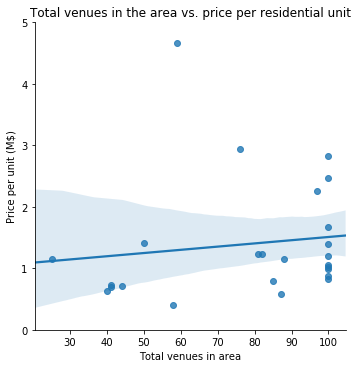

In [234]:
## Correlation between total venue in the area to the price per residential unit
#ax=sns.lmplot(x="Venue", y="PricePerUnit", hue="Cluster", data=MedianSellVenue);
ax=sns.lmplot(x="Venue", y="PricePerUnit", data=MedianSellVenue);
ax.set(xlabel='Total venues in area', ylabel='Price per unit (M$)')
ax.set(ylim=(0, 5))
plt.title('Total venues in the area vs. price per residential unit')

Analysis of each neighborhood based on types of venues

In [235]:


# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Tiki Bar,Toy / Game Sto

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [236]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Tiki Bar,Toy / Game Sto

In [237]:

#### Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Harlem----
                  venue  freq
0    African Restaurant  0.07
1     French Restaurant  0.05
2   American Restaurant  0.05
3  Gym / Fitness Center  0.05
4    Chinese Restaurant  0.05


----Chelsea----
                 venue  freq
0          Coffee Shop  0.08
1          Art Gallery  0.08
2       Ice Cream Shop  0.04
3  American Restaurant  0.03
4                 Café  0.03


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.06
1              Bakery  0.04
2        Cocktail Bar  0.04
3        Optical Shop  0.03
4     Bubble Tea Shop  0.03


----Civic Center----
                 venue  freq
0          Coffee Shop  0.06
1         Cocktail Bar  0.05
2                Hotel  0.05
3  American Restaurant  0.04
4                  Spa  0.04


----Clinton----
                  venue  freq
0               Theater  0.09
1  Gym / Fitness Center  0.05
2           Coffee Shop  0.05
3    Italian Restaurant  0.05
4                 Hotel  0.04


----East Harlem----


In [238]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [239]:
#Now let's create the new dataframe and display the top 5 venues for each neighborhood.
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central Harlem,African Restaurant,Chinese Restaurant,French Restaurant,Gym / Fitness Center,Cosmetics Shop
1,Chelsea,Coffee Shop,Art Gallery,Ice Cream Shop,Café,Bakery
2,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Optical Shop,Spa
3,Civic Center,Coffee Shop,Hotel,Cocktail Bar,Spa,French Restaurant
4,Clinton,Theater,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Wine Shop


Run *k*-means to cluster the neighborhood into 5 clusters.

In [240]:
# set number of clusters
kVenue = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kVenue, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 2, 2, 0, 3, 2, 2, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [241]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,NaN,NaN,NaN,NaN,NaN,NaN
1,Manhattan,Chinatown,40.715618,-73.994279,3.0,Chinese Restaurant,Bakery,Cocktail Bar,Optical Shop,Spa
2,Manhattan,Washington Heights,40.851903,-73.936900,0.0,Café,Deli / Bodega,Bakery,Mobile Phone Shop,Latin American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,0.0,Mexican Restaurant,Lounge,Restaurant,Bakery,Café
4,Manhattan,Hamilton Heights,40.823604,-73.949688,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
manhattan_merged.dropna(subset=["Cluster Labels"], axis=0,inplace=True)
manhattan_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Manhattan,Chinatown,40.715618,-73.994279,3.0,Chinese Restaurant,Bakery,Cocktail Bar,Optical Shop,Spa
2,Manhattan,Washington Heights,40.851903,-73.936900,0.0,Café,Deli / Bodega,Bakery,Mobile Phone Shop,Latin American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,0.0,Mexican Restaurant,Lounge,Restaurant,Bakery,Café
6,Manhattan,Central Harlem,40.815976,-73.943211,3.0,African Restaurant,Chinese Restaurant,French Restaurant,Gym / Fitness Center,Cosmetics Shop
7,Manhattan,East Harlem,40.792249,-73.944182,0.0,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant
8,Manhattan,Upper East Side,40.775639,-73.960508,1.0,Italian Restaurant,Coffee Shop,Bakery,Gym / Fitness Center,Yoga Studio
11,Manhattan,Roosevelt Island,40.762160,-73.949168,4.0,Park,Plaza,School,Gym,Greek Restaurant
12,Manhattan,Upper West Side,40.787658,-73.977059,3.0,Italian Restaurant,Bar,Dessert Shop,Indian Restaurant,Wine Bar
14,Manhattan,Clinton,40.759101,-73.996119,2.0,Theater,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Wine Shop
15,Manhattan,Midtown,40.754691,-73.981669,2.0,Hotel,Coffee Shop,Bakery,Theater,Cuban Restaurant


In [243]:
## Combining the clustering data from the venues with the median sell table.
MedianSellVenue = MedianSellVenue.merge(manhattan_merged.iloc[:,[1,4,5,6,7,8,9]], left_on="Hood", right_on="Neighborhood", how="outer", suffixes=("_1", "_2"))
#manhattan_merged.iloc[:,[1,4,5,6,7,8,9]]

                                         
MedianSellVenue

,Hood,PricePerUnit,Borough,Neighborhood_1,Latitude,Longitude,Cluster,Venue,Neighborhood_2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central Harlem,0.710000,Manhattan,Central Harlem,40.815976,-73.943211,1,44,Central Harlem,3.0,African Restaurant,Chinese Restaurant,French Restaurant,Gym / Fitness Center,Cosmetics Shop
1,Chelsea,1.195000,Manhattan,Chelsea,40.744035,-74.003116,2,100,Chelsea,3.0,Coffee Shop,Art Gallery,Ice Cream Shop,Café,Bakery
2,Chinatown,1.059500,Manhattan,Chinatown,40.715618,-73.994279,2,100,Chinatown,3.0,Chinese Restaurant,Bakery,Cocktail Bar,Optical Shop,Spa
3,Civic Center,2.466200,Manhattan,Civic Center,40.715229,-74.005415,4,100,Civic Center,2.0,Coffee Shop,Hotel,Cocktail Bar,Spa,French Restaurant
4,Clinton,0.871500,Manhattan,Clinton,40.759101,-73.996119,2,100,Clinton,2.0,Theater,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Wine Shop
5,East Harlem,0.701500,Manhattan,East Harlem,40.792249,-73.944182,1,41,East Harlem,0.0,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant
6,East Village,0.820000,Manhattan,East Village,40.727847,-73.982226,2,100,East Village,3.0,Bar,Mexican Restaurant,Coffee Shop,Cocktail Bar,Pizza Place
7,Financial District,1.022250,Manhattan,Financial District,40.707107,-74.010665,2,100,Financial District,2.0,Coffee Shop,American Restaurant,Pizza Place,Café,Italian Restaurant
8,Flatiron,1.675000,Manhattan,Flatiron,40.739673,-73.990947,3,100,Flatiron,2.0,Gym / Fitness Center,Café,Italian Restaurant,Mediterranean Restaurant,Gym
9,Gramercy,1.225000,Manhattan,Gramercy,40.737210,-73.981376,2,82,Gramercy,3.0,Bagel Shop,Coffee Shop,Bar,Pizza Place,American Restaurant


In [246]:
MedianSellVenue=MedianSellVenue.rename(columns={'Cluster': 'Price Cluster', 'Cluster Labels': 'Venue Cluster'})
MedianSellVenue

,Hood,PricePerUnit,Borough,Neighborhood_1,Latitude,Longitude,Price Cluster,Venue,Neighborhood_2,Venue Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central Harlem,0.710000,Manhattan,Central Harlem,40.815976,-73.943211,1,44,Central Harlem,3.0,African Restaurant,Chinese Restaurant,French Restaurant,Gym / Fitness Center,Cosmetics Shop
1,Chelsea,1.195000,Manhattan,Chelsea,40.744035,-74.003116,2,100,Chelsea,3.0,Coffee Shop,Art Gallery,Ice Cream Shop,Café,Bakery
2,Chinatown,1.059500,Manhattan,Chinatown,40.715618,-73.994279,2,100,Chinatown,3.0,Chinese Restaurant,Bakery,Cocktail Bar,Optical Shop,Spa
3,Civic Center,2.466200,Manhattan,Civic Center,40.715229,-74.005415,4,100,Civic Center,2.0,Coffee Shop,Hotel,Cocktail Bar,Spa,French Restaurant
4,Clinton,0.871500,Manhattan,Clinton,40.759101,-73.996119,2,100,Clinton,2.0,Theater,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Wine Shop
5,East Harlem,0.701500,Manhattan,East Harlem,40.792249,-73.944182,1,41,East Harlem,0.0,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant
6,East Village,0.820000,Manhattan,East Village,40.727847,-73.982226,2,100,East Village,3.0,Bar,Mexican Restaurant,Coffee Shop,Cocktail Bar,Pizza Place
7,Financial District,1.022250,Manhattan,Financial District,40.707107,-74.010665,2,100,Financial District,2.0,Coffee Shop,American Restaurant,Pizza Place,Café,Italian Restaurant
8,Flatiron,1.675000,Manhattan,Flatiron,40.739673,-73.990947,3,100,Flatiron,2.0,Gym / Fitness Center,Café,Italian Restaurant,Mediterranean Restaurant,Gym
9,Gramercy,1.225000,Manhattan,Gramercy,40.737210,-73.981376,2,82,Gramercy,3.0,Bagel Shop,Coffee Shop,Bar,Pizza Place,American Restaurant


Text(0.5, 1, 'Total venues in the area vs. price per residential unit - Clustered by neighborhood with most common venues types')

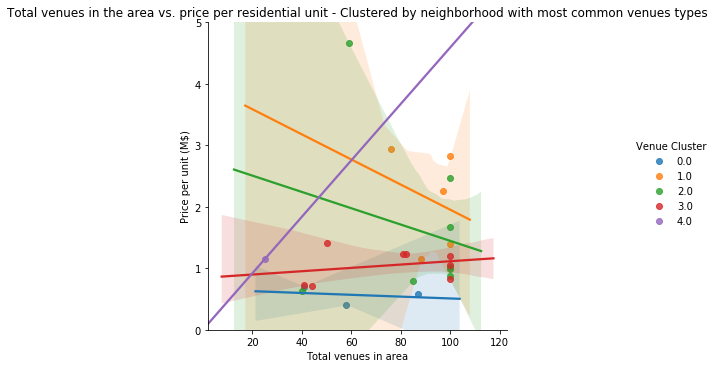

In [247]:
## Correlation between total venue in the area to the price per residential unit now it is organized by neighborhood type of venues clusters
ax=sns.lmplot(x="Venue", y="PricePerUnit", hue="Venue Cluster", data=MedianSellVenue);

ax.set(xlabel='Total venues in area', ylabel='Price per unit (M$)')
ax.set(ylim=(0, 5))
plt.title('Total venues in the area vs. price per residential unit - Clustered by neighborhood with most common venues types')

In [248]:

MedianSellVenue.loc[MedianSellVenue['Venue Cluster'] == 0]

,Hood,PricePerUnit,Borough,Neighborhood_1,Latitude,Longitude,Price Cluster,Venue,Neighborhood_2,Venue Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,East Harlem,0.701500,Manhattan,East Harlem,40.792249,-73.944182,1,41,East Harlem,0.0,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant
12,Inwood,0.407043,Manhattan,Inwood,40.867684,-73.921210,1,58,Inwood,0.0,Mexican Restaurant,Lounge,Restaurant,Bakery,Café
24,Washington Heights,0.590147,Manhattan,Washington Heights,40.851903,-73.936900,1,87,Washington Heights,0.0,Café,Deli / Bodega,Bakery,Mobile Phone Shop,Latin American Restaurant


Let's checkout the mean of price per unit by neighborhood cluster type. 

In [249]:
MedianSellVenue.groupby(['Venue Cluster'],as_index=False).mean()

,Venue Cluster,PricePerUnit,Latitude,Longitude,Price Cluster,Venue
0,0.0,0.566230,40.837279,-73.934098,1.000,62.00
1,1.0,2.112000,40.733120,-73.993813,3.200,92.20
2,2.0,1.638345,40.748595,-73.990894,2.625,85.50
3,3.0,1.046999,40.755432,-73.978306,1.750,74.75
4,4.0,1.150000,40.762160,-73.949168,2.000,25.00


In [250]:
MedianSellVenue.loc[MedianSellVenue['Venue Cluster'] == 1]

,Hood,PricePerUnit,Borough,Neighborhood_1,Latitude,Longitude,Price Cluster,Venue,Neighborhood_2,Venue Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Greenwich Village,1.400,Manhattan,Greenwich Village,40.726933,-73.999914,2,100,Greenwich Village,1.0,Italian Restaurant,Café,Sushi Restaurant,Gym,Comedy Club
13,Little Italy,2.825,Manhattan,Little Italy,40.719324,-73.997305,4,100,Little Italy,1.0,Italian Restaurant,Bakery,Mediterranean Restaurant,Spa,Pizza Place
20,Soho,2.250,Manhattan,Soho,40.722184,-74.000657,4,97,Soho,1.0,Italian Restaurant,Sandwich Place,Mediterranean Restaurant,Clothing Store,Coffee Shop
21,Tribeca,2.940,Manhattan,Tribeca,40.721522,-74.010683,4,76,Tribeca,1.0,Italian Restaurant,American Restaurant,Park,Wine Bar,Greek Restaurant
22,Upper East Side,1.145,Manhattan,Upper East Side,40.775639,-73.960508,2,88,Upper East Side,1.0,Italian Restaurant,Coffee Shop,Bakery,Gym / Fitness Center,Yoga Studio


In [251]:
MedianSellVenue.loc[MedianSellVenue['Venue Cluster'] == 2]

,Hood,PricePerUnit,Borough,Neighborhood_1,Latitude,Longitude,Price Cluster,Venue,Neighborhood_2,Venue Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Civic Center,2.466200,Manhattan,Civic Center,40.715229,-74.005415,4,100,Civic Center,2.0,Coffee Shop,Hotel,Cocktail Bar,Spa,French Restaurant
4,Clinton,0.871500,Manhattan,Clinton,40.759101,-73.996119,2,100,Clinton,2.0,Theater,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Wine Shop
7,Financial District,1.022250,Manhattan,Financial District,40.707107,-74.010665,2,100,Financial District,2.0,Coffee Shop,American Restaurant,Pizza Place,Café,Italian Restaurant
8,Flatiron,1.675000,Manhattan,Flatiron,40.739673,-73.990947,3,100,Flatiron,2.0,Gym / Fitness Center,Café,Italian Restaurant,Mediterranean Restaurant,Gym
11,Hudson Yards,4.666812,Manhattan,Hudson Yards,40.756658,-74.000111,5,59,Hudson Yards,2.0,Hotel,Italian Restaurant,Gym / Fitness Center,American Restaurant,Coffee Shop
16,Midtown,0.990000,Manhattan,Midtown,40.754691,-73.981669,2,100,Midtown,2.0,Hotel,Coffee Shop,Bakery,Theater,Cuban Restaurant
17,Morningside Heights,0.627500,Manhattan,Morningside Heights,40.808000,-73.963896,1,40,Morningside Heights,2.0,Park,American Restaurant,Coffee Shop,Bookstore,Sandwich Place
18,Murray Hill,0.787500,Manhattan,Murray Hill,40.748303,-73.978332,2,85,Murray Hill,2.0,Hotel,Sandwich Place,Coffee Shop,Gym / Fitness Center,Japanese Restaurant


In [252]:
MedianSellVenue.loc[MedianSellVenue['Venue Cluster'] == 3]

,Hood,PricePerUnit,Borough,Neighborhood_1,Latitude,Longitude,Price Cluster,Venue,Neighborhood_2,Venue Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central Harlem,0.710000,Manhattan,Central Harlem,40.815976,-73.943211,1,44,Central Harlem,3.0,African Restaurant,Chinese Restaurant,French Restaurant,Gym / Fitness Center,Cosmetics Shop
1,Chelsea,1.195000,Manhattan,Chelsea,40.744035,-74.003116,2,100,Chelsea,3.0,Coffee Shop,Art Gallery,Ice Cream Shop,Café,Bakery
2,Chinatown,1.059500,Manhattan,Chinatown,40.715618,-73.994279,2,100,Chinatown,3.0,Chinese Restaurant,Bakery,Cocktail Bar,Optical Shop,Spa
6,East Village,0.820000,Manhattan,East Village,40.727847,-73.982226,2,100,East Village,3.0,Bar,Mexican Restaurant,Coffee Shop,Cocktail Bar,Pizza Place
9,Gramercy,1.225000,Manhattan,Gramercy,40.737210,-73.981376,2,82,Gramercy,3.0,Bagel Shop,Coffee Shop,Bar,Pizza Place,American Restaurant
14,Lower East Side,1.406496,Manhattan,Lower East Side,40.717807,-73.980890,2,50,Lower East Side,3.0,Chinese Restaurant,Art Gallery,Pharmacy,Café,Cocktail Bar
15,Manhattan Valley,0.735000,Manhattan,Manhattan Valley,40.797307,-73.964286,1,41,Manhattan Valley,3.0,Coffee Shop,Yoga Studio,Mexican Restaurant,Bar,Pizza Place
23,Upper West Side,1.225000,Manhattan,Upper West Side,40.787658,-73.977059,2,81,Upper West Side,3.0,Italian Restaurant,Bar,Dessert Shop,Indian Restaurant,Wine Bar


In [253]:
MedianSellVenue.loc[MedianSellVenue['Venue Cluster'] == 4]

,Hood,PricePerUnit,Borough,Neighborhood_1,Latitude,Longitude,Price Cluster,Venue,Neighborhood_2,Venue Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,Roosevelt Island,1.15,Manhattan,Roosevelt Island,40.76216,-73.949168,2,25,Roosevelt Island,4.0,Park,Plaza,School,Gym,Greek Restaurant
